# Úloha č. 2: Test hypotézy

Overte nasledujúcu hypotézu s 95% istotou:

*Pokiaľ bol vinník nehody pod silným vplyvom alkoholu, došlo častejšie k ťažkým zdravotným následkom.*

In [1]:
###
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

## Načítanie a vyčistenie dát

In [2]:
# Načítanie dát
df = pd.read_pickle("accidents.pkl.gz")

# Vytvorenie DataFrame iba so stĺpcami, ktoré potrebujem
data = df[["p11", "p13a", "p13b"]]

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 487161 entries, 0 to 487160
Data columns (total 65 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   p1            487161 non-null  object 
 1   p36           487161 non-null  object 
 2   p37           487161 non-null  object 
 3   p2a           487161 non-null  object 
 4   weekday(p2a)  487161 non-null  object 
 5   p2b           487161 non-null  object 
 6   p6            487161 non-null  object 
 7   p7            487161 non-null  int32  
 8   p8            487161 non-null  int32  
 9   p9            487161 non-null  int32  
 10  p10           487161 non-null  int32  
 11  p11           487161 non-null  int32  
 12  p12           487161 non-null  int32  
 13  p13a          487161 non-null  int32  
 14  p13b          487161 non-null  int32  
 15  p13c          487161 non-null  int32  
 16  p14           487161 non-null  int32  
 17  p15           487161 non-null  int32  
 18  p16 

### Štruktúra stĺpcov *p11*, *p13a* a *p13b*

#### *p11*
Predstavuje prítomnosť alkoholu u vinníka nehody. Povolené sú celé čísla z intervalu **<0,9>**.

| Hodnota | Alkohol |
|---|---|
| 0 | nezisťované |
| 1 | áno, < 0.24 ‰ |
| 2 | nie |
| 3 | áno, >= 0.24 & < 0.5 ‰ |
| 4 | pod vplyvom drog |
| 5 | pod vplyvom alkoholu a drog |
| 6 | áno, >= 0.5 & < 0.8 ‰ |
| 7 | áno, >= 0.8 & < 1.0 ‰ |
| 8 | áno, >= 1.0 & < 1.5 ‰ |
| 9 | áno, >= 1.5 ‰ |

Za silný vplyv alkoholu budeme považovať iba stavy, keď ***p11* >= 7 ** a vylúčime nehody pod vplyvom drog (***p11* = 4** a ***p11* = 5**).


#### *p13a*
Predstavuje počet osôb, ktoré boli usmrtené pri nehode.
Hodnota musí byť celé číslo **>= 0**.

#### *p13b*
Predstavuje počet osôb, ktoré boli ťažko zranené pri nehode.
Hodnota musí byť celé číslo **>= 0**.

### Odstrániť hodnôt mimo rozsah zo stĺpcov *p11*, *p13a* a *p13b*

In [3]:
data = data.query('p11 >= 0 & p11 <= 9 & p11 != 4 & p11 != 5 & p13a >= 0 & p13b >= 0')

In [7]:
data.head()

,p11,p13a,p13b
0,2,0,0
1,2,0,0
2,2,0,0
3,9,0,0
4,0,0,0


## Hľadanie regresného modelu
Zistiť, či neexistuje korelácia medzi nezávislými premennými

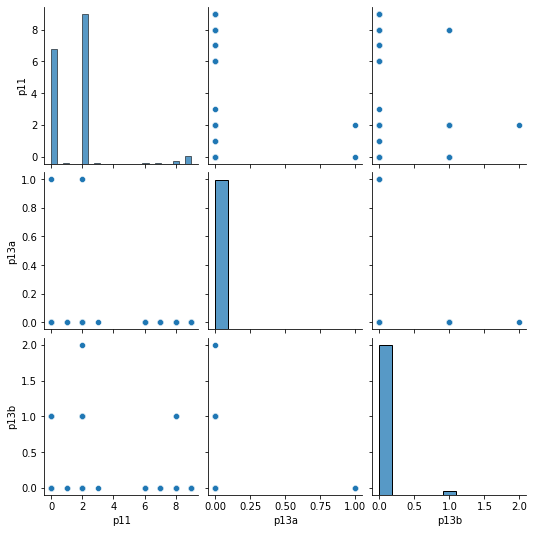

In [6]:
sns.pairplot(data.sample(1000)[["p11", "p13a","p13b"]])

Z grafu nie je vidieť korelácia.

In [4]:
data["value"] = data["p13a"] + data["p13b"]

<AxesSubplot:xlabel='p11', ylabel='value'>

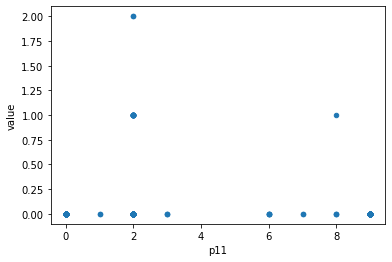

In [6]:
data.sample(1000).plot.scatter(x="p11", y="value")

In [16]:
# vytvoříme pole příznaků
ks = []
ks += ["p11"] 

# Vytvoříme vektory X a y
X = data[ks].astype("int32")
y = data["value"]

# Spustíme trénování
model = LinearRegression()
model.fit(X, y)

LinearRegression()

In [15]:
# Vypíšme kvalitu a koeficienty
print(model.score(X, y))

# Určíme predikovanou hodnotu
data["predicted"] = model.predict(X)

0.004317915026178842


<AxesSubplot:>

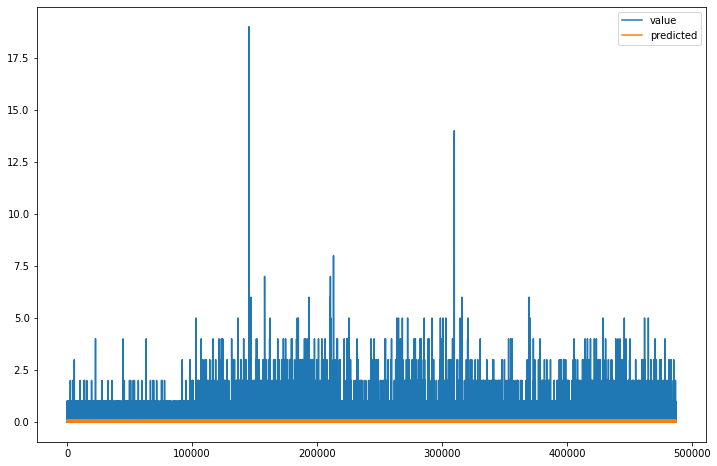

In [11]:
ax = data.plot(y="value", figsize=(12, 8))
data.plot(y="predicted", ax=ax)